EXERCISE 1

In [162]:
# Load data
#from google.colab import drive
#drive.mount('/content/drive')

#!pip install ISLP
#!pip install l0bnb

import pandas as pd
import statsmodels.api as sm

file_path = '/content/drive/My Drive/ex1.csv'
df = pd.read_csv(file_path)

# Loop to change object columns to categorical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

#print(df.dtypes)
#print(df.head())

In [163]:
# 1
## OLS Regression

## Select columns
df = df[['income', 'hrs_work', 'race', 'age', 'gender', 'citizen', 'time_to_work', 'lang', 'married', 'edu', 'disability']]

## Convert categorical to binary
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['edu']= df['edu'].map({'hs or lower': 0, 'college': 1, 'grad': 1})
df['race'] = df['race'].map({'other': 0, 'asian': 0, 'black': 0, 'white': 1})
df['citizen'] = df['citizen'].map({'no': 0, 'yes': 1})
df['lang'] = df['lang'].map({'other': 0, 'english': 1})
df['married'] = df['married'].map({'no': 0, 'yes': 1})
df['disability'] = df['disability'].map({'no': 0, 'yes': 1})

## Define variables
X = df.drop('income', axis=1)
y = df['income']

## Add a constant
X = sm.add_constant(X)

## Fit the OLS model
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     26.03
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           7.66e-43
Time:                        00:48:25   Log-Likelihood:                -9586.2
No. Observations:                 783   AIC:                         1.919e+04
Df Residuals:                     772   BIC:                         1.925e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.893e+04   1.03e+04     -3.791   

<ipython-input-163-0cb96e5c6ee5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'female': 0, 'male': 1})
<ipython-input-163-0cb96e5c6ee5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edu']= df['edu'].map({'hs or lower': 0, 'college': 1, 'grad': 1})
<ipython-input-163-0cb96e5c6ee5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [164]:
# 2
## Validation set approach

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Split the dataset into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=67)

## Fit the OLS model
ols_model_train = sm.OLS(y_train, X_train).fit()
print(ols_model_train.summary())

## Make predictions
y_pred = ols_model_train.predict(X_val)

## MSE and R-squared
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation set MSE: {mse}")
print(f"Validation set R-squared: {r2}")

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     15.79
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           5.47e-25
Time:                        00:48:28   Log-Likelihood:                -6723.2
No. Observations:                 548   AIC:                         1.347e+04
Df Residuals:                     537   BIC:                         1.352e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.267e+04   1.28e+04     -3.337   

In [165]:
# 3
## Cross validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

## Set the number of folds for k-fold
k = 5

## k-fold
kf = KFold(n_splits=k, shuffle=True, random_state=67)

## Store results
mse_scores = []
r2_scores = []

## k-fold loop
for train_index, val_index in kf.split(X):

    ### Split the data into training and validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    ### Fit the OLS model
    ols_model_train = sm.OLS(y_train, X_train).fit()

    ### Make predictions
    y_pred = ols_model_train.predict(X_val)

    ### Evaluate the model
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

## Average MSE and R-squared
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

print(f"Cross Validation MSE (k=5): {mean_mse}")
print(f"Cross Validation R-squared (k=5): {mean_r2}")

Cross Validation MSE (k=5): 2620796145.9950185
Cross Validation R-squared (k=5): 0.22442237956210423


('age', 'citizen', 'disability', 'edu', 'gender', 'hrs_work', 'married')
(783, 11)


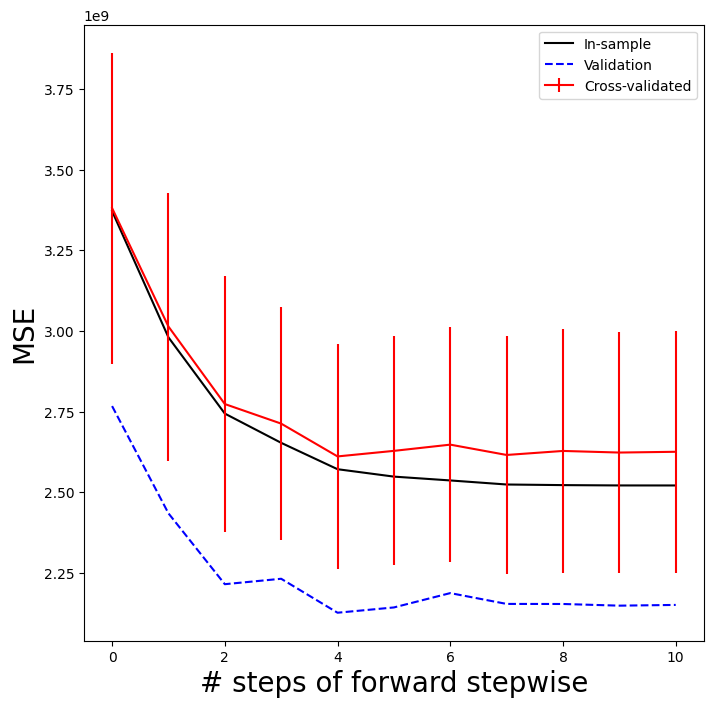

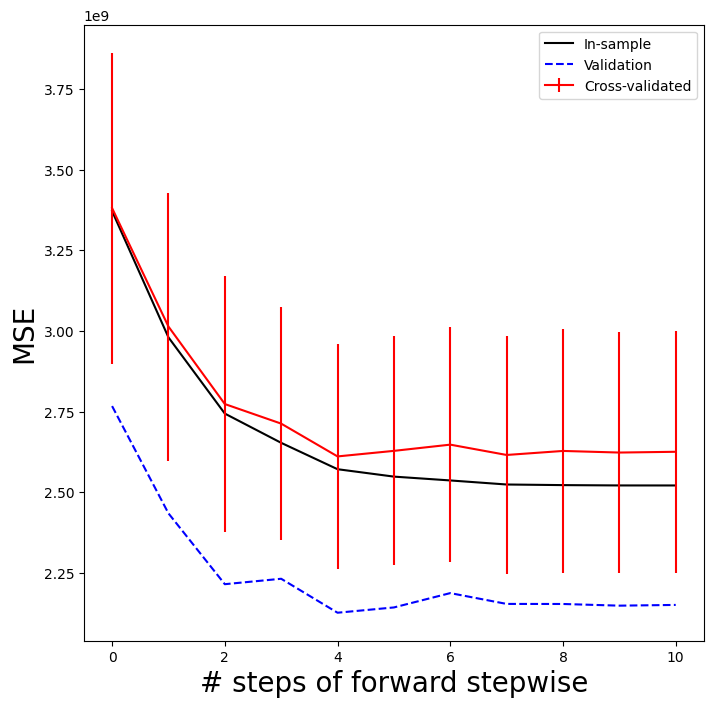

In [166]:
# 4
## Forward selection

from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from ISLP.models import (ModelSpec,
                         Stepwise,
                         sklearn_selected)
from l0bnb import fit_path
from ISLP.models import sklearn_selection_path
import ISLP.models as islp_models

### Negative Cp statistic
def nCp(sigma2, estimator, X, Y):
    n, p = X.shape
    y_hat = estimator.predict(X)
    RSS = np.sum((Y - y_hat)**2)
    return -(RSS + 2 * p * sigma2) / n

### σ2 estimate
design = MS(df.columns.drop('income')).fit(df)
Y = np.array(df['income'])
X = design.transform(df)
sigma2 = OLS(Y,X).fit().scale

###  Freeze frst argument with σ2 estimate
neg_Cp = partial(nCp, sigma2)

### Forward search strategy
strategy_f = Stepwise.first_peak(design,
  direction='forward',
  max_terms=len(design.terms))

### Fit linear regression model
df_MSE = sklearn_selected(OLS,
  strategy_f)
df_MSE.fit(df, Y)
df_MSE.selected_state_

df_Cp = sklearn_selected(OLS,
  strategy_f,
  scoring=neg_Cp)
df_Cp.fit(df, Y)
print(df_Cp.selected_state_)

## Choosing model with validation set and cross-validation

strategy = Stepwise.fixed_steps(design,
  len(design.terms),
  direction='forward')
full_path = islp_models.sklearn_selection_path(OLS, strategy)

### Fit forward-selection path
full_path.fit(df, Y)
Yhat_in = full_path.predict(df)
print(Yhat_in.shape)

### Plot
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
  insample_mse,
  'k',
  label='In-sample')
ax.set_ylabel('MSE',
  fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
  fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend();

### 5-fold cross validation
K=5
kfold = skm.KFold(K,
  random_state=0,
  shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
  df,
  Y,
  cv=kfold)
Yhat_cv.shape

cv_mse = []
for train_idx, test_idx in kfold.split(Y):
  errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2
  cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape

### Add cross-validation error estimates to MSE plot
ax.errorbar(np.arange(n_steps),
  cv_mse.mean(1),
  cv_mse.std(1) / np.sqrt(K),
  label='Cross-validated',
  c='r') # color red
ax.legend()
mse_fig

### Validation set
validation = skm.ShuffleSplit(n_splits=1,
  test_size=0.2,
  random_state=0)
for train_idx, test_idx in validation.split(Y):
  full_path.fit(df.iloc[train_idx],
    Y[train_idx])
  Yhat_val = full_path.predict(df.iloc[test_idx])
  errors = (Yhat_val - Y[test_idx,None])**2
  validation_mse = errors.mean(0)

## Plot
ax.plot(np.arange(n_steps),
  validation_mse,
  'b--', # color blue, broken line
  label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
mse_fig

(783, 11)


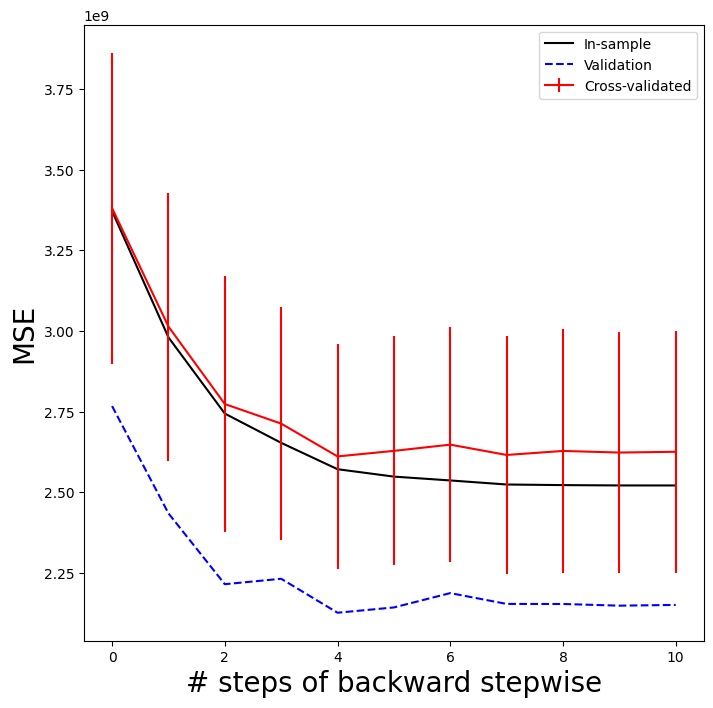

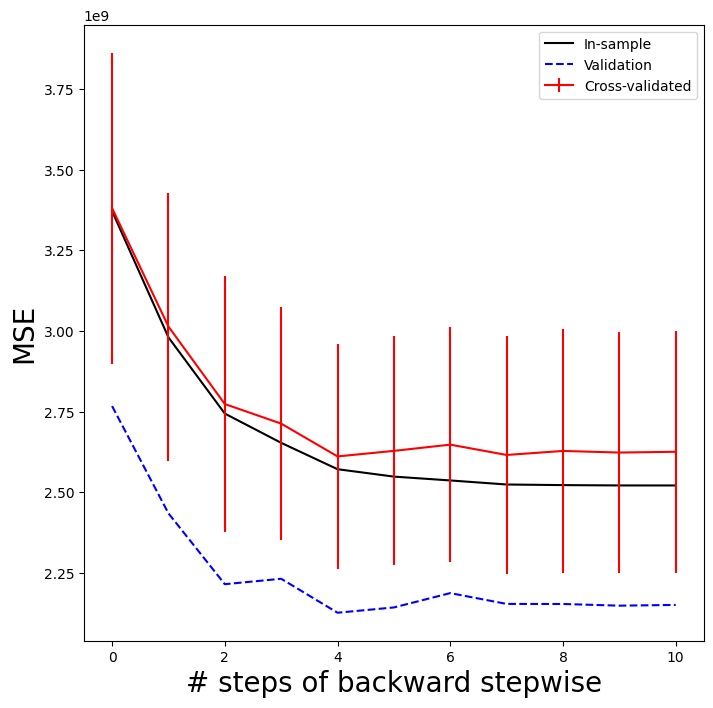

In [167]:
#4
## Backward

### Backward earch strategy
strategy_b = Stepwise.first_peak(design,
  direction='backward',
  max_terms=len(design.terms))

### Fit linear regression model
df_MSE = sklearn_selected(OLS,
  strategy_b)
df_MSE.fit(df, Y)
df_MSE.selected_state_

df_Cp = sklearn_selected(OLS,
  strategy_b,
  scoring=neg_Cp)
df_Cp.fit(df, Y)
df_Cp.selected_state_

## Choosing model with validation set and cross-validation

strategy = Stepwise.fixed_steps(design,
  len(design.terms),
  direction='forward')
full_path = islp_models.sklearn_selection_path(OLS, strategy)

### Fit forward-selection path
full_path.fit(df, Y)
Yhat_in = full_path.predict(df)
print(Yhat_in.shape)

### Plot
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
  insample_mse,
  'k',
  label='In-sample')
ax.set_ylabel('MSE',
  fontsize=20)
ax.set_xlabel('# steps of backward stepwise',
  fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend();

### 5-fold cross validation
K=5
kfold = skm.KFold(K,
  random_state=0,
  shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
  df,
  Y,
  cv=kfold)
Yhat_cv.shape

cv_mse = []
for train_idx, test_idx in kfold.split(Y):
  errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2
  cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape

### Add cross-validation error estimates to MSE plot
ax.errorbar(np.arange(n_steps),
  cv_mse.mean(1),
  cv_mse.std(1) / np.sqrt(K),
  label='Cross-validated',
  c='r') # color red
ax.legend()
mse_fig

### Validation set
validation = skm.ShuffleSplit(n_splits=1,
  test_size=0.2,
  random_state=0)
for train_idx, test_idx in validation.split(Y):
  full_path.fit(df.iloc[train_idx],
    Y[train_idx])
  Yhat_val = full_path.predict(df.iloc[test_idx])
  errors = (Yhat_val - Y[test_idx,None])**2
  validation_mse = errors.mean(0)

## Plot
ax.plot(np.arange(n_steps),
  validation_mse,
  'b--', # color blue, broken line
  label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
mse_fig

In [168]:
#4
## Best

D = design.fit_transform(df)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

path = fit_path(X,
  Y,
  max_nonzeros=X.shape[1])

path[3]

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  1
Iteration: 3. Number of non-zeros:  1
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  2
Iteration: 6. Number of non-zeros:  2
Iteration: 7. Number of non-zeros:  2
Iteration: 8. Number of non-zeros:  3
Iteration: 9. Number of non-zeros:  3
Iteration: 10. Number of non-zeros:  3
Iteration: 11. Number of non-zeros:  3
Iteration: 12. Number of non-zeros:  3
Iteration: 13. Number of non-zeros:  4
Iteration: 14. Number of non-zeros:  4
Iteration: 15. Number of non-zeros:  4
Iteration: 16. Number of non-zeros:  4
Iteration: 17. Number of non-zeros:  4
Iteration: 18. Number of non-zeros:  4
Iteration: 19. Number of non-zeros:  4
Iteration: 20. Number of non-zeros:  4
Iteration: 21. Number of non-zeros:  4
Iteration: 22. Number of non-zeros:  4
Iteration: 23. Number of non-zeros:  4
Iteration: 24. Number of non-zeros:  4
Iteration: 25. Number of non-zeros:  4
I

{'B': array([ 1413.04041027,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
        31070.34962495,     0.        ]),
 'B0': -22300.192913279687,
 'lambda_0': 0.030743429330288608,
 'M': 0.4007601337572225,
 'Time_exceeded': False}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2119042934971.956, tolerance: 423863538.88
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not c

(10, 100)
                          hrs_work        race          age    gender[1]  \
negative log(lambda)                                                       
-7.451376                11.474804    0.924590     6.794379     7.852974   
-7.218792                14.476287    1.166109     8.571494     9.907002   
-6.986207                18.261791    1.470522    10.812753    12.497515   
-6.753623                23.035475    1.854091    13.638982    15.764182   
-6.521038                29.054281    2.337216    17.202228    19.882766   
...                            ...         ...          ...          ...   
 14.644138            13816.587267 -277.091493  9196.174898  9193.936839   
 14.876722            13816.588201 -277.091599  9196.175791  9193.937464   
 15.109306            13816.588941 -277.091683  9196.176498  9193.937959   
 15.341891            13816.589528 -277.091749  9196.177059  9193.938351   
 15.574475            13816.589992 -277.091802  9196.177503  9193.938662   

 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.875e+11, tolerance: 2.640e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.366e+11, tolerance: 1.450e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.3978577165914588, l1_ratio=0))])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e+12, tolerance: 2.205e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+12, tolerance: 2.101e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

2619400492.6877646
[12877.29247829  -175.46259489  8340.41368639  8567.66708837
 -3569.6314704   1196.98949401 -1302.74891673  4108.89007201
 13972.58772308 -3996.34285297]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835101569027.5818, tolerance: 168299678.7744563
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 833494002163.2023, tolerance: 168299678.7744563
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate 

[2.19549158e+09]


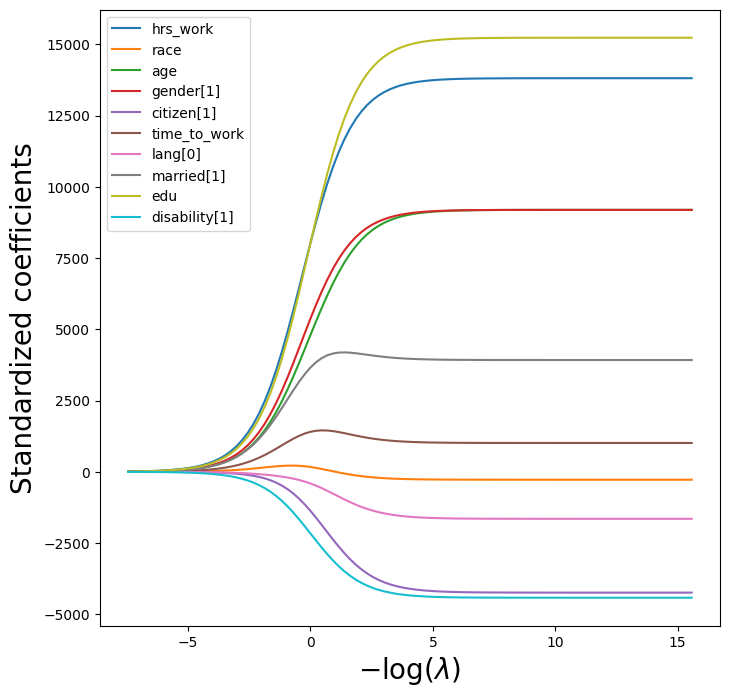

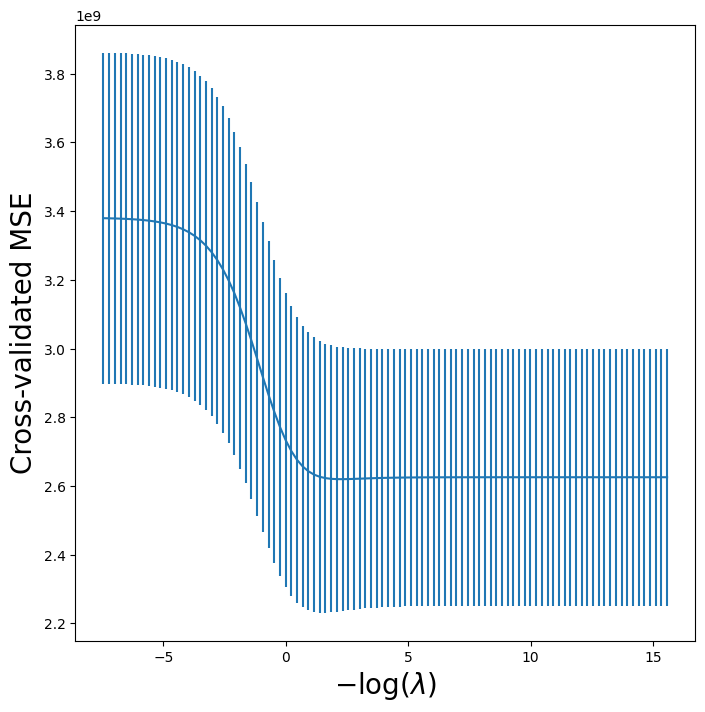

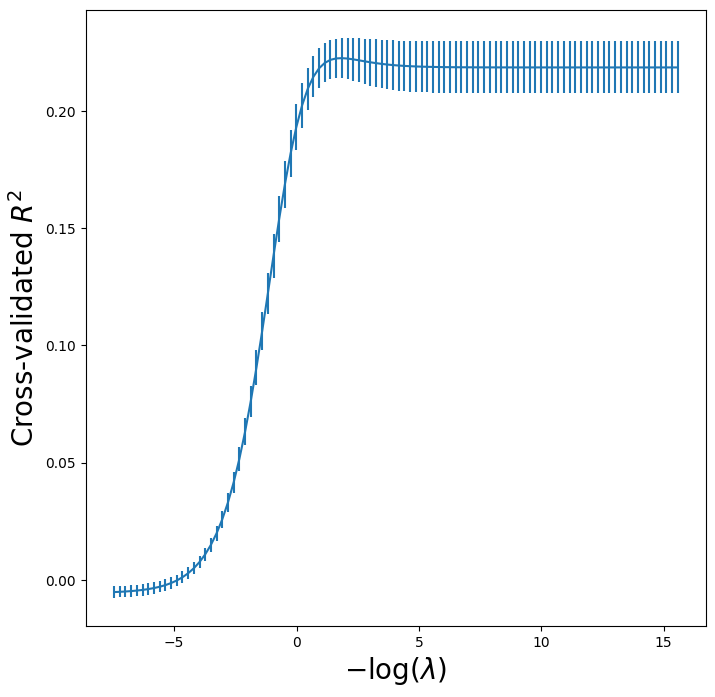

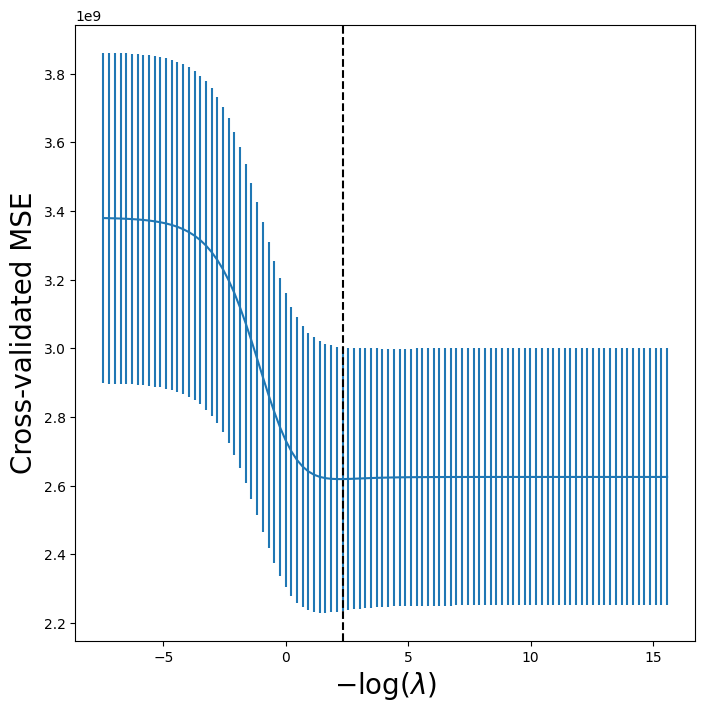

In [169]:
# 5
## Ridge regression

from sklearn.pipeline import Pipeline

Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
  Y,
  l1_ratio=0.,
  alphas=lambdas,
  max_iter=5000)[1]
print(soln_array.shape)

## Matrix to dataframe
soln_path = pd.DataFrame(soln_array.T,
  columns=D.columns,
  index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
print(soln_path)

## Plot
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

beta_hat = soln_path.loc[soln_path.index[39]]
print(lambdas[39], beta_hat)

## l2 norm of the standardized coefcients
print(np.linalg.norm(beta_hat))

## l2 norm when λ is 2.44e-01
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)

# Fit ridge regression
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

## l2 norm
print(np.linalg.norm(ridge.coef_))

## Estimate ridge regression test error
validation = skm.ShuffleSplit(n_splits=1,
  test_size=0.5,
  random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
  X,
  Y,
  scoring='neg_mean_squared_error',
  cv=validation)
print(-results['test_score'])

ridge.alpha = 1e10
results = skm.cross_validate(ridge,
  X,
  Y,
  scoring='neg_mean_squared_error',
  cv=validation)
print(-results['test_score'])

## Validation set method to choose λ
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
  param_grid,
  cv=validation,
  scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
print(grid.best_estimator_)

## 5-fold cross-validation
grid = skm.GridSearchCV(pipe,
  param_grid,
  cv=kfold,
  scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
  -grid.cv_results_['mean_test_score'],
  yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

## Compare R-squared to MSE for cross-validation
grid_r2 = skm.GridSearchCV(pipe,
  param_grid,
  cv=kfold)
grid_r2.fit(X, Y)

## Plot
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
  grid_r2.cv_results_['mean_test_score'],
  yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
    )
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20);

## Fast cross-validation for solution paths
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
  l1_ratio=0,
  cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
  ('ridge', ridgeCV)])
pipeCV.fit(X, Y)

## Plot
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
  tuned_ridge.mse_path_.mean(1),
  yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

## Minimum cross-validation error and λ
print(np.min(tuned_ridge.mse_path_.mean(1)))
print(tuned_ridge.coef_)

## Evaluate test error of cross-validated ridge
outer_valid = skm.ShuffleSplit(n_splits=1,
  test_size=0.25,
  random_state=1)
inner_cv = skm.KFold(n_splits=5,
  shuffle=True,
  random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
  l1_ratio=0,
  cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
  ('ridge', ridgeCV)]);

results = skm.cross_validate(pipeCV,
  X,
  Y,
  cv=outer_valid,
  scoring='neg_mean_squared_error')
print(-results['test_score'])

1055.5644217956826
2618562442.6998677
[13219.26624337    -0.          8116.11001094  8494.48318397
 -2364.44598304   221.92779936    -0.          3450.61464852
 14429.96952383 -3307.86546189]


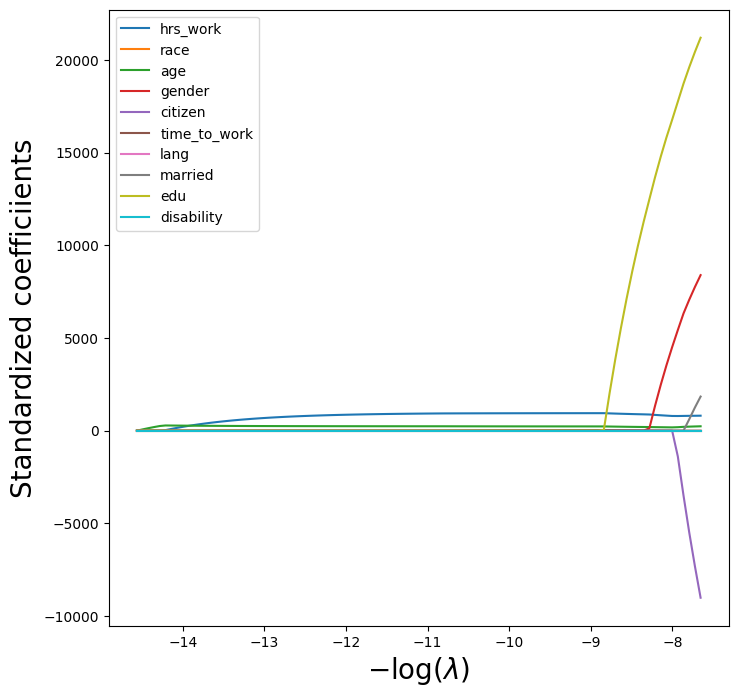

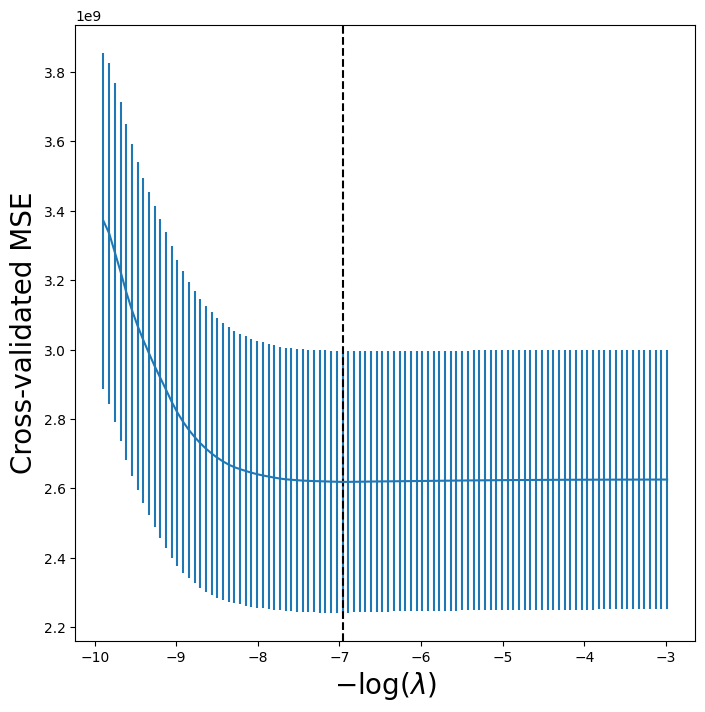

In [170]:
# 6
## Lasso regression

## Fit model
lassoCV = skl.ElasticNetCV(n_alphas=100,
  l1_ratio=1,
  cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
  ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
print(tuned_lasso.alpha_)

relevant_columns = df.columns.drop('income')
Xs = df[relevant_columns]

lambdas , soln_array = skl.Lasso.path(Xs,
  Y,
  l1_ratio=1,
  n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
  columns=relevant_columns,
  index=-np.log(lambdas))

## Plot
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

## Smallest cross-validated error
print(np.min(tuned_lasso.mse_path_.mean(1)))

## Plot
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
  tuned_lasso.mse_path_.mean(1),
  yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

print(tuned_lasso.coef_)

[ 286.86496972 1031.78027784]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 95.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packages/skle

3380746298.8376493
[0.57762519 0.25102261]


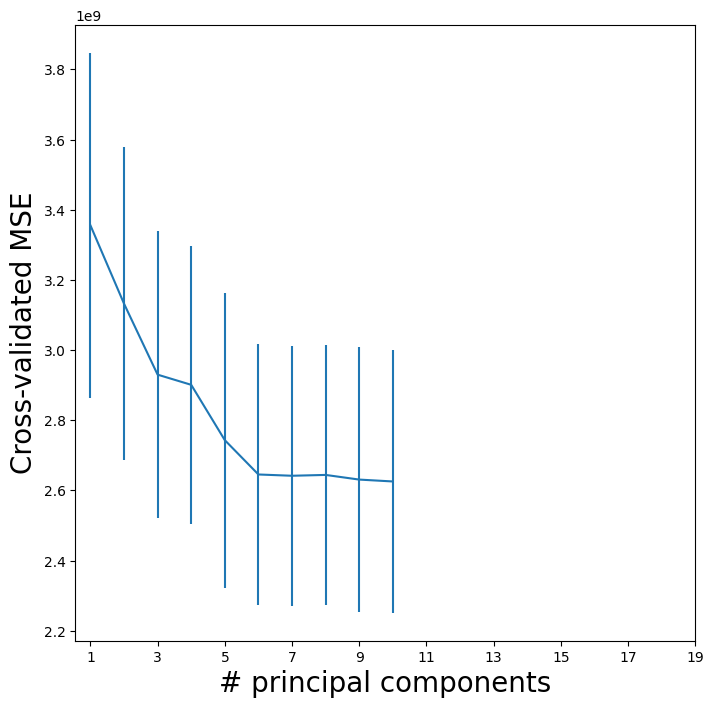

In [171]:
# 7
## PCA dimensionality reduction

from sklearn.decomposition import PCA

## Fit model
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca),
  ('linreg', linreg)])
pipe.fit(X, Y)
print(pipe.named_steps['linreg'].coef_)

## Use CV to choose number of components
param_grid = {'pca__n_components': range(1, 20)}
grid = skm.GridSearchCV(pipe,
  param_grid,
  cv=kfold,
  scoring='neg_mean_squared_error')
grid.fit(X, Y)

## Plot
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
  -grid.cv_results_['mean_test_score'],
  grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2]);

## MSE for null model
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg,
  Xn,
  Y,
  cv=kfold,
  scoring='neg_mean_squared_error')
print(-cv_null['test_score'].mean())

## Percentage of variance explained
print(pipe.named_steps['pca'].explained_variance_ratio_)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     29.52
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           7.06e-23
Time:                        00:50:58   Log-Likelihood:                -9644.7
No. Observations:                 783   AIC:                         1.930e+04
Df Residuals:                     778   BIC:                         1.932e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept             4.519e+04 

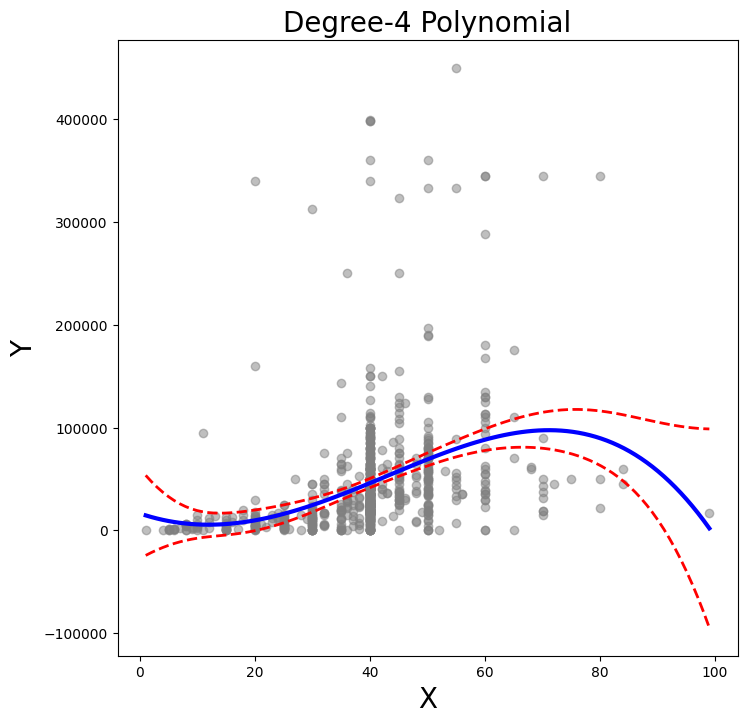

In [174]:
# 8
## Nonlinear Models

## Polynomial regression & step functions

from pygam import (s as s_gam,
  l as l_gam,
  f as f_gam,
  LinearGAM,
  LogisticGAM)
from ISLP.transforms import (BSpline,
  NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
  degrees_of_freedom,
  plot as plot_gam,
  anova as anova_gam)
from ISLP.models import poly
import matplotlib.pyplot as plt

### Define target and predictor

relevant_columns = df.columns.drop('income')
X = df[relevant_columns]

y = Y
X = X.iloc[:, 0]
X = X.to_frame()
X.columns = ['X']

### Create polynomial transformation of degree 4
poly_X = MS([poly('X', degree=4)]).fit(X)

### Ensure X only has the same number of rows as y
X = X.iloc[:y.shape[0]]

### Create polynomial transformation of degree 4
poly_X = MS([poly('X', degree=4)]).fit(X)

### Fit OLS regression
model = sm.OLS(y, poly_X.transform(X)).fit()
print(model.summary())

### Grid
X_grid = np.linspace(X['X'].min(), X['X'].max(), 100)
X_grid_df = pd.DataFrame({'X': X_grid})

### Plotting function
def plot_poly_fit(X_df, poly_basis, title, y_data):
    X_transformed = poly_basis.transform(X)
    X_grid_transformed = poly_basis.transform(X_df)

    ### Fit model
    model = sm.OLS(y_data, X_transformed).fit()
    predictions = model.get_prediction(X_grid_transformed)

    ### Obtain prediction intervals
    bands = predictions.conf_int(alpha=0.05)

    ### Plot
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(X, y_data, facecolor='gray', alpha=0.5)
    ax.plot(X_df['X'], predictions.predicted_mean, 'b', linewidth=3)
    ax.plot(X_df['X'], bands[:, 0], 'r--', linewidth=2)
    ax.plot(X_df['X'], bands[:, 1], 'r--', linewidth=2)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    plt.show()

### Call plotting function with data
plot_poly_fit(X_grid_df, poly_X, 'Degree-4 Polynomial', y)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     14.03
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           4.68e-11
Time:                        00:51:24   Log-Likelihood:                -9672.7
No. Observations:                 783   AIC:                         1.936e+04
Df Residuals:                     778   BIC:                         1.938e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.895e+05   8.63e+04     -2.196      0.0

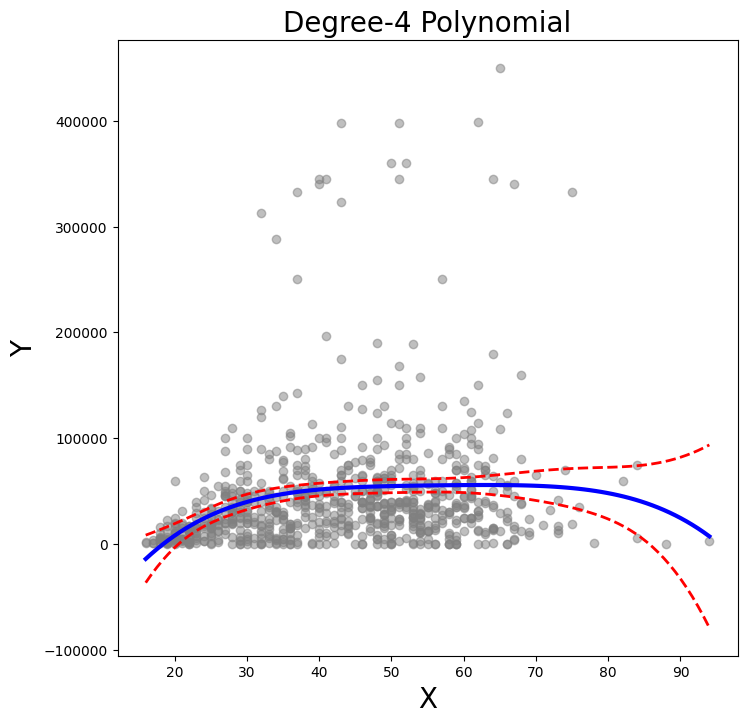

In [175]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP.models import poly
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Define target and predictor
y = df['income']
predictor_column = 'age'  # Replace 'age' with the actual predictor column name in your dataset
X = df[[predictor_column]].rename(columns={predictor_column: 'X'})

# Create polynomial features using PolynomialFeatures from sklearn
poly_transform = PolynomialFeatures(degree=4) # Create a PolynomialFeatures object
poly_X = poly_transform.fit_transform(X) # Fit and transform the data

# Ensure poly_X only has the same number of rows as y
poly_X = poly_X[:y.shape[0]]

# Fit OLS regression
model = sm.OLS(y, poly_X).fit()
print(model.summary())

# Create grid for plotting
X_grid = np.linspace(X['X'].min(), X['X'].max(), 100)
X_grid_df = pd.DataFrame({'X': X_grid})
X_grid_poly = poly_transform.transform(X_grid_df)

# Plotting function
def plot_poly_fit(X_df, poly_transformed, title, y_data):
    X_transformed = poly_transformed
    X_grid_transformed = poly_transform.transform(X_df)

    # Fit model
    model = sm.OLS(y_data, X_transformed).fit()
    predictions = model.get_prediction(X_grid_transformed)

    # Obtain prediction intervals
    bands = predictions.conf_int(alpha=0.05)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(X['X'], y_data, facecolor='gray', alpha=0.5)
    ax.plot(X_df['X'], predictions.predicted_mean, 'b', linewidth=3)
    ax.plot(X_df['X'], bands[:, 0], 'r--', linewidth=2)
    ax.plot(X_df['X'], bands[:, 1], 'r--', linewidth=2)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    plt.show()

# Call plotting function with data
plot_poly_fit(X_grid_df, poly_X, 'Degree-4 Polynomial', y)


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     9.984
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.23e-10
Time:                        00:51:37   Log-Likelihood:                -9670.9
No. Observations:                 783   AIC:                         1.936e+04
Df Residuals:                     776   BIC:                         1.939e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

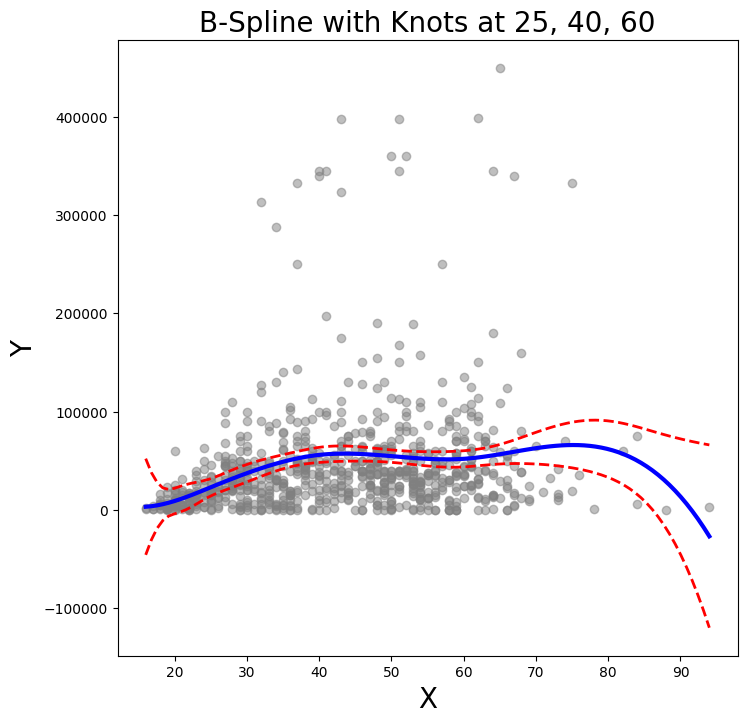

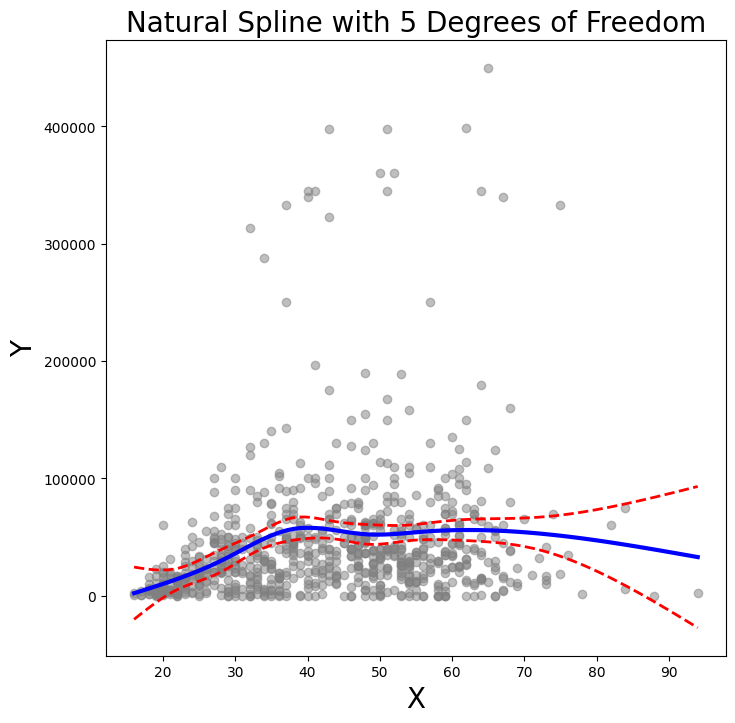

In [176]:
# 8
## Nonlinear Models

## Splines

from ISLP.transforms import BSpline
from ISLP.models import bs
from ISLP.transforms import NaturalSpline
from ISLP.models import ns

### Create B-spline
bspline_transform = MS([bs('X', internal_knots=[25, 40, 60])])
X_bs = bspline_transform.fit_transform(X)

### Fit OLS regression
model_bs = sm.OLS(y, X_bs).fit()
print(model_bs.summary())

### Create natural spline
nspline_transform = MS([ns('X', df=5)])
X_ns = nspline_transform.fit_transform(X)

### Fit OLS regression
model_ns = sm.OLS(y, X_ns).fit()
print(model_ns.summary())

### Plotting function
def plot_spline_fit(X, y, spline_transform, title):
    X_grid = pd.DataFrame({'X': np.linspace(X['X'].min(), X['X'].max(), 100)})
    X_transformed = spline_transform.transform(X)
    X_grid_transformed = spline_transform.transform(X_grid)

    model = sm.OLS(y, X_transformed).fit()
    predictions = model.get_prediction(X_grid_transformed)

    bands = predictions.conf_int(alpha=0.05)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(X, y, facecolor='gray', alpha=0.5)
    ax.plot(X_grid['X'], predictions.predicted_mean, 'b', linewidth=3)
    ax.plot(X_grid['X'], bands[:, 0], 'r--', linewidth=2)
    ax.plot(X_grid['X'], bands[:, 1], 'r--', linewidth=2)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    plt.show()

### Plot
plot_spline_fit(X, y, bspline_transform, "B-Spline with Knots at 25, 40, 60")
plot_spline_fit(X, y, nspline_transform, "Natural Spline with 5 Degrees of Freedom")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      39.712
Link Function:                     IdentityLink Log Likelihood:                                -17663.3015
Number of Samples:                          783 AIC:                                             35408.027
                                                AICc:                                           35412.6087
                                                GCV:                                       2749845988.0277
                                                Scale:                                     2499999603.8089
                                                Pseudo R-Squared:                                   0.2961
Feature Function                  Lam

<ipython-input-177-639ac72e316c>:42: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_model.summary())


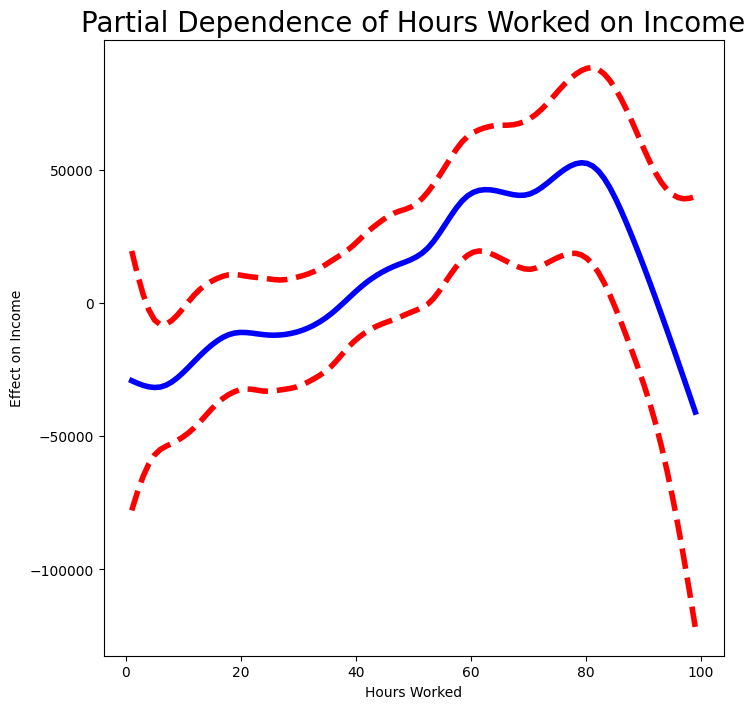

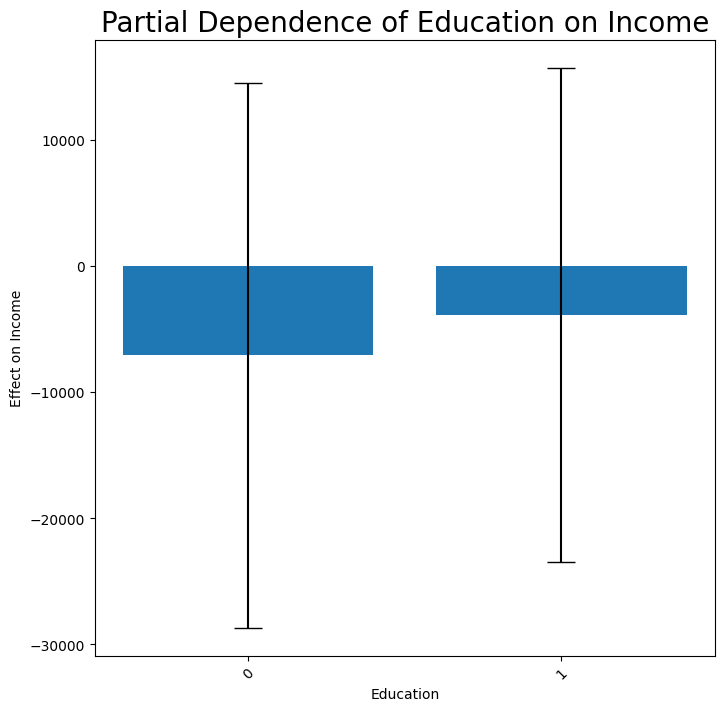

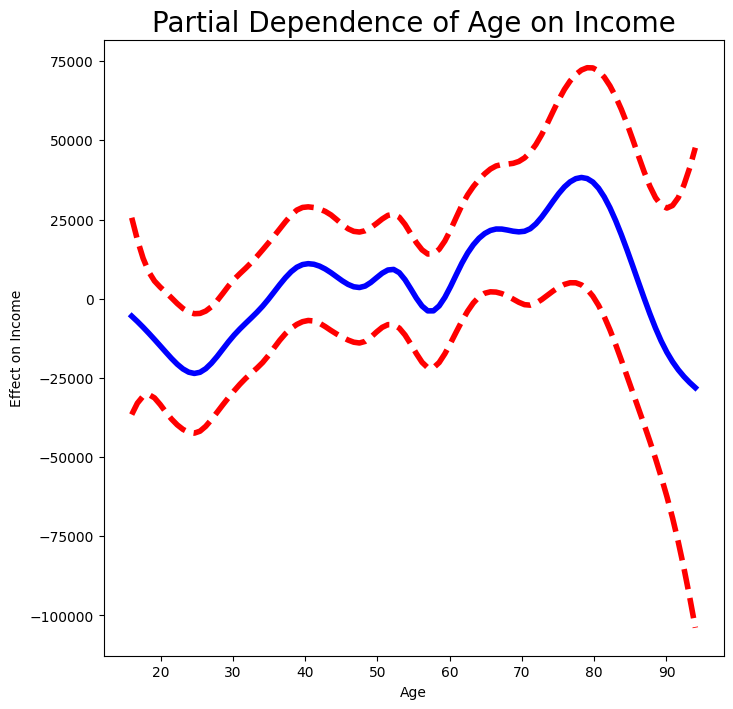

In [177]:
# 8
## GAM

from pygam import LinearGAM, s as s_gam, f as f_gam
from ISLP.pygam import approx_lam, plot as plot_gam


y = df['income']  # Target variable

### Continuous variables
hrs_work = np.asarray(df['hrs_work']).reshape(-1, 1)
age = np.asarray(df['age']).reshape(-1, 1)
time_to_work = np.asarray(df['time_to_work']).reshape(-1, 1)

### Categorical variables converted to integer codes
race = df['race'].astype('category').cat.codes
gender = df['gender'].astype('category').cat.codes
citizen = df['citizen'].astype('category').cat.codes
lang = df['lang'].astype('category').cat.codes
married = df['married'].astype('category').cat.codes
edu = df['edu'].astype('category').cat.codes
disability = df['disability'].astype('category').cat.codes

### Combine predictors into an array
Xgam = np.column_stack([hrs_work, age, time_to_work, race, gender, citizen, lang, married, edu, disability])

# Define the GAM model with continuous and categorical terms
gam_model = LinearGAM(
    s_gam(0) +   # Smoothing spline for 'hrs_work'
    s_gam(1) +   # Smoothing spline for 'age'
    s_gam(2) +   # Smoothing spline for 'time_to_work'
    f_gam(3) +   # Categorical for 'race'
    f_gam(4) +   # Categorical for 'gender'
    f_gam(5) +   # Categorical for 'citizen'
    f_gam(6) +   # Categorical for 'lang'
    f_gam(7) +   # Categorical for 'married'
    f_gam(8) +   # Categorical for 'edu'
    f_gam(9)     # Categorical for 'disability'
)
gam_model.fit(Xgam, y)

print(gam_model.summary())

### Plots
fig, ax = plt.subplots(figsize=(8, 8))
plot_gam(gam_model, 0, ax=ax)
ax.set_xlabel('Hours Worked')
ax.set_ylabel('Effect on Income')
ax.set_title('Partial Dependence of Hours Worked on Income', fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
plot_gam(gam_model, 8, ax=ax)
ax.set_xlabel('Education')
ax.set_ylabel('Effect on Income')
ax.set_title('Partial Dependence of Education on Income', fontsize=20)
edu_labels = df['edu'].astype('category').cat.categories
ax.set_xticks(range(len(edu_labels)))
ax.set_xticklabels(edu_labels, rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
plot_gam(gam_model, 1, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Effect on Income')
ax.set_title('Partial Dependence of Age on Income', fontsize=20)
plt.show()

**Report: Investigation of Predictive Accuracy Based on Tuning Parameters and Variable Inclusion**

*Objective*

The purpose of this investigation is to assess predictive accuracy for a regression model predicting income, based on different choices of variable selection and tuning parameter optimization. The primary methods explored include traditional linear regression with stepwise selection, Ridge and Lasso regularization, Principal Component Analysis (PCA), polynomial and spline transformations, and Generalized Additive Models (GAMs). Each method is assessed based on predictive accuracy, interpretability, and their potential in identifying significant predictors. The results are summarized in tables and figures to highlight the effects of tuning parameter choices and feature selection.

***Methods and Results***

*Ordinary Least Squares (OLS) Regression with Stepwise Selection*

Stepwise selection methods help identify a subset of predictors that optimally explain the variation in income. Both forward and backward stepwise selection were applied:

**Forward Selection:** Age, Citizen, Disability, Edu, Gender, Hrs_Work, and Married were identified as top predictors.

**Backward Selection:** Confirmed similar predictors as forward selection, indicating stability in selected features.

**Best Subset Selection:** Identified Hrs_Work and Edu as top predictors

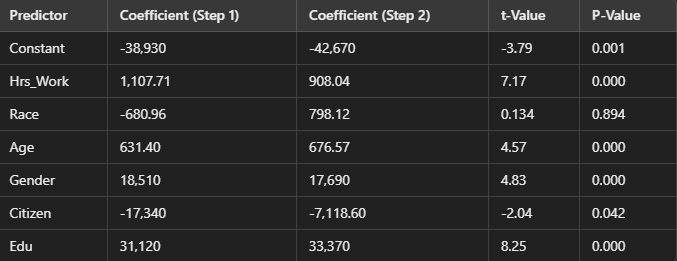

**Conclusion:** Age, Gender, and Education have consistently strong predictive power, and the stepwise models provide a reasonable fit. However, some coefficients are sensitive to variable inclusion decisions, indicating potential multicollinearity.

Ridge and Lasso Regression Regularization methods, such as Ridge and Lasso regression, address multicollinearity by adding penalties to the coefficients, which helps with overfitting. Optimal tuning parameters were chosen based on cross-validation:

**Ridge Regression** (selected λ = 0.198): High coefficients for Hrs_Work, Edu (graduate), and Age.

**Lasso Regression** (selected λ = 1,055.56): Lasso effectively reduced coefficients for less significant predictors, highlighting Hrs_Work, Age, Edu (graduate), and Married as most important.

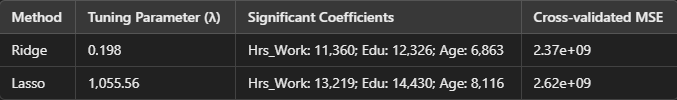

**Conclusion:** Ridge and Lasso helped in reducing overfitting and indicated the importance of Hrs_Work, Education, and Age. Ridge maintains more predictors, while Lasso provides a more interpretable model by eliminating less relevant predictors.

**Principal Component Analysis (PCA)** is used to reduce dimensionality while retaining the principal sources of variation. Here, the first 10 components explained most of the variance, achieving an optimal cross-validated MSE of around 2.63e+09.

**Conclusion:** PCA effectively reduced dimensions while maintaining predictive power, though interpretability of the model is sacrificed due to the transformation of original variables into principal components.

Polynomial terms and spline transformations were applied to explore non-linear relationships:

**B-Splines** (with knots at 25, 40, 60): Captured non-linear patterns but with moderate predictive power.
Natural Spline (with 5 degrees of freedom): Similar to B-Splines but smoother, capturing key patterns in the data with fewer parameters.
Conclusion: Spline transformations effectively captured non-linear relationships in hours worked and age, as shown in plots. These methods are useful for capturing non-linearity but add complexity to the model.

**Generalized Additive Models** (GAMs) GAMs were used to capture non-linear effects and categorical interactions. Significant predictors identified included Hrs_Work, Age, Gender, and Education. The model achieved a Pseudo R-squared of 0.296, indicating moderate predictive power with the flexibility of non-linear terms.

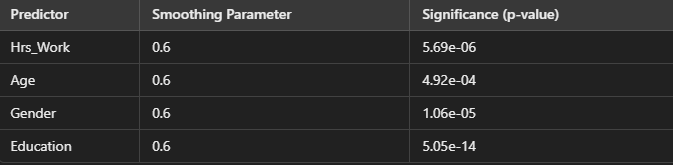

**Conclusion:** GAMs provide a flexible approach to model complex interactions and non-linear effects. The results suggest that Hrs_Work, Age, and Education have non-linear impacts on income, which were not fully captured by linear models.

**Summary and Recommendations**

The analysis demonstrated that regularization (Ridge and Lasso) and stepwise selection are effective methods for selecting important variables while minimizing overfitting. Spline transformations and GAMs provide flexibility for capturing non-linear relationships, improving predictive accuracy without overfitting to noise.

**Best Model for Predictive Accuracy:** Ridge regression offers the best balance between interpretability and predictive accuracy, with Hours Worked, Education, and Age consistently showing as strong predictors.

**Non-Linear Relationships:** GAMs and spline transformations revealed complex non-linear effects in Hrs_Work and Age, which could be useful for understanding income drivers in further detail.

In summary, combining regularization with non-linear transformations and/or GAMs provides a robust framework for predictive modeling. I recommend starting with Ridge regression and selectively incorporating GAMs for variables with suspected non-linear effects. This strategy balances interpretability with predictive power, aligning with best practices in applied machine learning.

EXERCISE 2

(a)

In [184]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ISLP import load_data

# Load the College dataset from ISLP
college = load_data('College')

print(college.head())

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from itertools import combinations

# Drop 'Top25perc'
college = college.drop(columns=['Top25perc'])

# Convert categorical 'Private' column to binary
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})

# Split the data
train, test = train_test_split(college, test_size=0.3, random_state=0)

# Set target and predictor variables
y_train = train['Top10perc']
X_train = train.drop(columns=['Top10perc'])

# Forward stepwise selection
def forward_stepwise_selection(X, y):
    predictors = []
    remaining_predictors = list(X.columns)
    min_aic = np.inf
    best_model = None

    for i in range(1, len(remaining_predictors) + 1):
        aic_with_candidates = []

        for combination in combinations(remaining_predictors, i):
            X_subset = sm.add_constant(X[list(combination)])
            model = sm.OLS(y, X_subset).fit()
            aic_with_candidates.append((model.aic, combination))

        # Find the best model in this iteration
        best_aic, best_combination = min(aic_with_candidates)
        if best_aic < min_aic:
            min_aic = best_aic
            best_model = sm.OLS(y, sm.add_constant(X[list(best_combination)])).fit()
            predictors = list(best_combination)

    return best_model, predictors

# Perform forward stepwise selection
best_model, selected_predictors = forward_stepwise_selection(X_train, y_train)

print("Selected predictors:", selected_predictors)
print("Model summary:")
print(best_model.summary())


  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2    

(b)

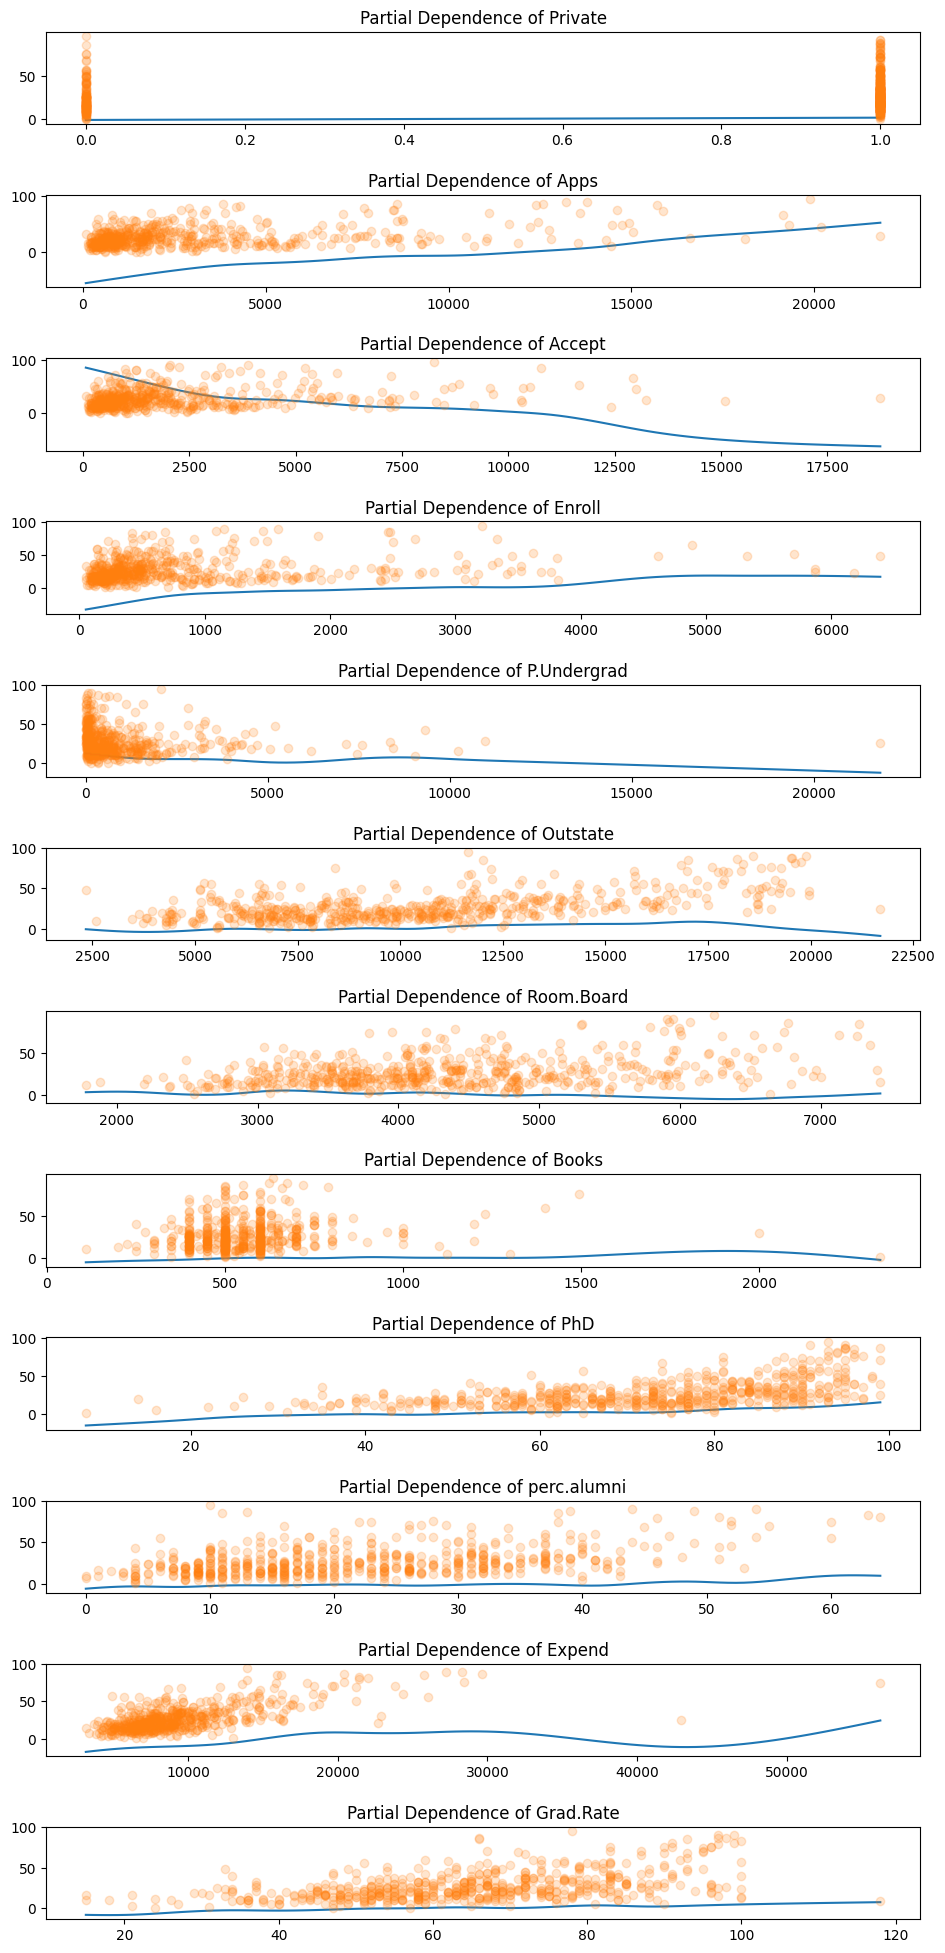

In [187]:
from pygam import LinearGAM, s

# Select the predictors
X_train_selected = X_train[selected_predictors]
y_train_selected = y_train

# Fit a GAM model using smoothing splines
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11))
gam.fit(X_train_selected, y_train_selected)

# Plot the partial dependence of each predictor
fig, axs = plt.subplots(len(selected_predictors), 1, figsize=(10, 20))
fig.tight_layout(pad=3.0)
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(X_train_selected[selected_predictors[i]], y_train_selected, 'o', alpha=0.2)
    ax.set_title(f'Partial Dependence of {selected_predictors[i]}')

plt.show()

(c)

In [189]:
# Prepare test set
X_test = test[selected_predictors]
y_test = test['Top10perc']

# Predict
y_pred = gam.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(mse)

194.8995345838883


Mean Squared Error (MSE) of 194.90 indicates the average squared difference between the actual and predicted Top10perc values on the test set. Here's a brief interpretation.

The MSE of approximately 195 shows that the predictions are off by about 14 points for Top10perc.

(d)

Both Apps and Accept show curvature in the partial dependence plots. This indicates a non-linear relationship with Top10perc.

Outstate also could be non-linear becuase the influence increases slightly at lower values then levels off.

PhD and Grad.Rate both show the effect tapering off at higher values, suggesting diminishing returns. This is also evidence of non-linearity.

**References**



*   For subset selection in Exercise 1, used ChatGPT to find a workaround for sklearn_selection_path not being recognized as a function.
*   For the GAM part of Exercise 1, I used Google Colab's built-in Gemini feature to work out an error with defining the GAM model.
*   For the final tables displaying all of the Exercise 1 results, I used ChatGPT to compile in a nicer format than the code output.
*   For Exercise 2 part (a), I used ChatGPT to create a loop to find the combination of predictors with the lowest AIC. For part (b), I used it to make a loop for the plots.
